In [15]:
import os
os.chdir("E:\PGPMLAI\Project 9")
os.getcwd()

'E:\\PGPMLAI\\Project 9'

In [16]:
from cv2 import imread,imwrite,imshow,waitKey,destroyAllWindows,CascadeClassifier,rectangle,cvtColor,COLOR_BGR2RGB

In [17]:
table_data = []

In [18]:
# image with bounding boxes will be saved to training_images_boxes directory 
save_out_dir = 'training_images_boxes'
if not os.path.exists(save_out_dir):
    os.makedirs(save_out_dir)


In [19]:
#Have downloaded pretrained xml file for face detection named "haarcascade_frontalface_default.xml" will use this file
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')

In [20]:
def create_face_box(pixels, image_name):
    bboxes = classifier.detectMultiScale(pixels)
    for box in bboxes:
        x, y, width, height = box
        x2, y2 = x + width, y + height
        rectangle(pixels, (x, y), (x2, y2), (0,0,255), 2)
        table_data.append([x, y, (x2-x), (y2-y), len(bboxes), image_name])
    return pixels

In [21]:
base_dir = 'E:\PGPMLAI\Project 9\part 2 training_images'


for image in os.listdir(base_dir):
    pixels = imread(base_dir + '/' + image)
    pixels_with_box = create_face_box(pixels, image)
    imwrite(save_out_dir + '/' + image, pixels_with_box)

In [22]:
destroyAllWindows()

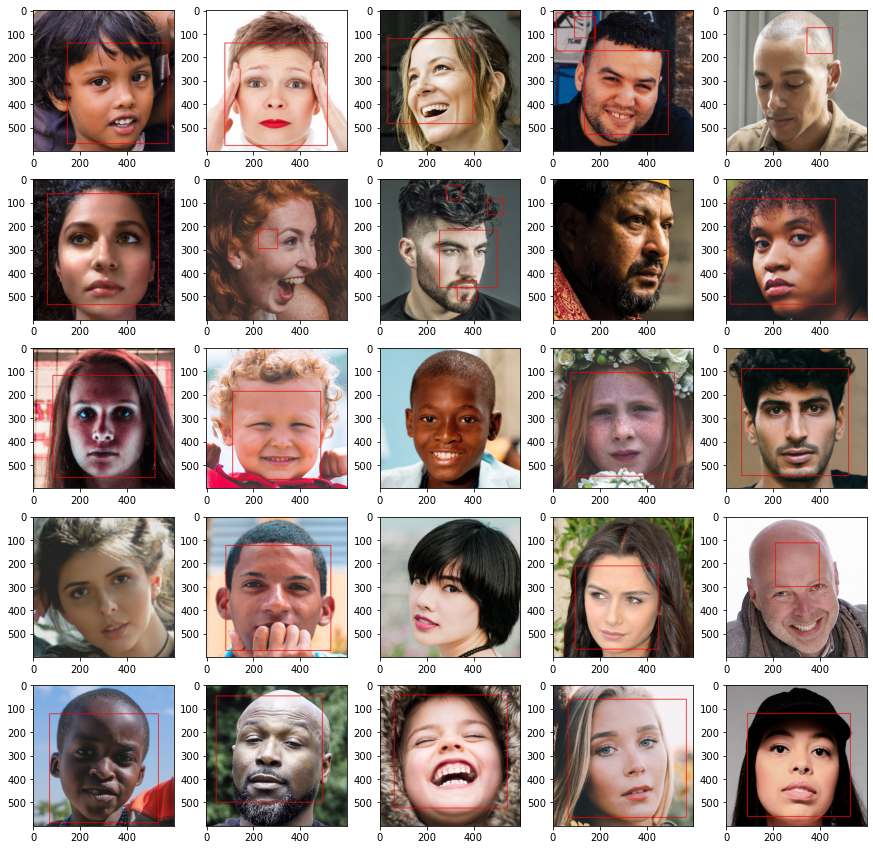

In [23]:
# testing it on some of our images
from matplotlib import pyplot as plt
images_to_show = 25
f, axarr = plt.subplots(int(images_to_show/5),5, figsize=(15,15))
i =0
for image in os.listdir(save_out_dir)[0:images_to_show]:
    pixels_with_box = imread(save_out_dir + '/' + image)
    pixels_with_box = cvtColor(pixels_with_box,COLOR_BGR2RGB)
    axarr[int(i/5),int(i%5)].imshow(pixels_with_box)
    i = i+1
plt.show()

In [24]:
# Required Table 
import pandas as pd
data = pd.DataFrame(table_data, columns=['x', 'y', 'w', 'h', 'Total_Faces', 'Image_Name'])
data.head(10)

,x,y,w,h,Total_Faces,Image_Name
0,146,140,428,428,1,real_00001.jpg
1,80,140,436,436,1,real_00002.jpg
2,33,121,362,362,1,real_00003.jpg
3,134,173,356,356,3,real_00004.jpg
4,91,28,90,90,3,real_00004.jpg
5,13,12,162,162,3,real_00004.jpg
6,344,75,110,110,1,real_00005.jpg
7,61,62,472,472,1,real_00006.jpg
8,222,213,83,83,1,real_00007.jpg
9,282,25,64,64,4,real_00008.jpg


# Challenges
faced using OpenCV was the use of predefined classifier.We can't tune this predefined classifier. It's accuracy depends on the xml file provided. 

For instance if you will increase images_to_show to 30 or 40, you will see the bounding box is larger than image size.

There is another method. we can create and train Conv Net model using the images in Part1 and use it to predict bounding box on the images of part2.